In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import master_ROCKE3D as mr
import os, glob

from matplotlib import gridspec, colorbar, colors
from matplotlib.cm import get_cmap
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

In [2]:
def sorter(filename):
    """
    Get an item from the list (one-by-one) and return a score for that item.
    Sorts based on PXXX in the .nc filename which occurs at the 17th-21st index for the files I'm looking at
    """
    return filename[17:21]

In [3]:
insolation = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

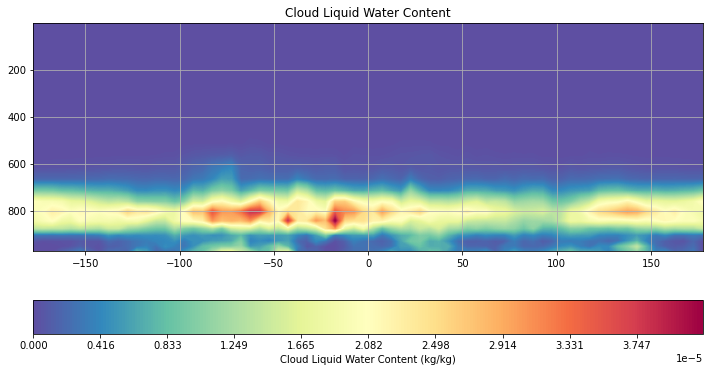

In [4]:
# Open data
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
filename = 'ANN0990-0999.aijlP211eoDOFP3Od_X064_O30.nc'
var = 'wtrcld'
data = Dataset(path + filename,'r')

# Import lat/lon coordinates and turn them into a meshgrid for plotting
plm = np.array(data['plm'])
lon = np.array(data['lon'])
lonGrid, plmGrid = np.meshgrid(lon, plm)

# Opens variable and converts it to an array
var1 = np.array(data[var])
var1 = np.average(var1,axis=1)

# Plotting
fig = plt.figure(figsize=(12,6))
ax = plt.axes()
ax.grid(True)
c1 = ax.contourf(lonGrid, plmGrid, var1, levels=np.linspace(np.min(var1), np.max(var1),1000), cmap='Spectral_r')
fig.colorbar(c1,label=(data[var].long_name +' ('+ data[var].units+')'), orientation="horizontal")
ax.set_title(data[var].long_name)
plt.gca().invert_yaxis()

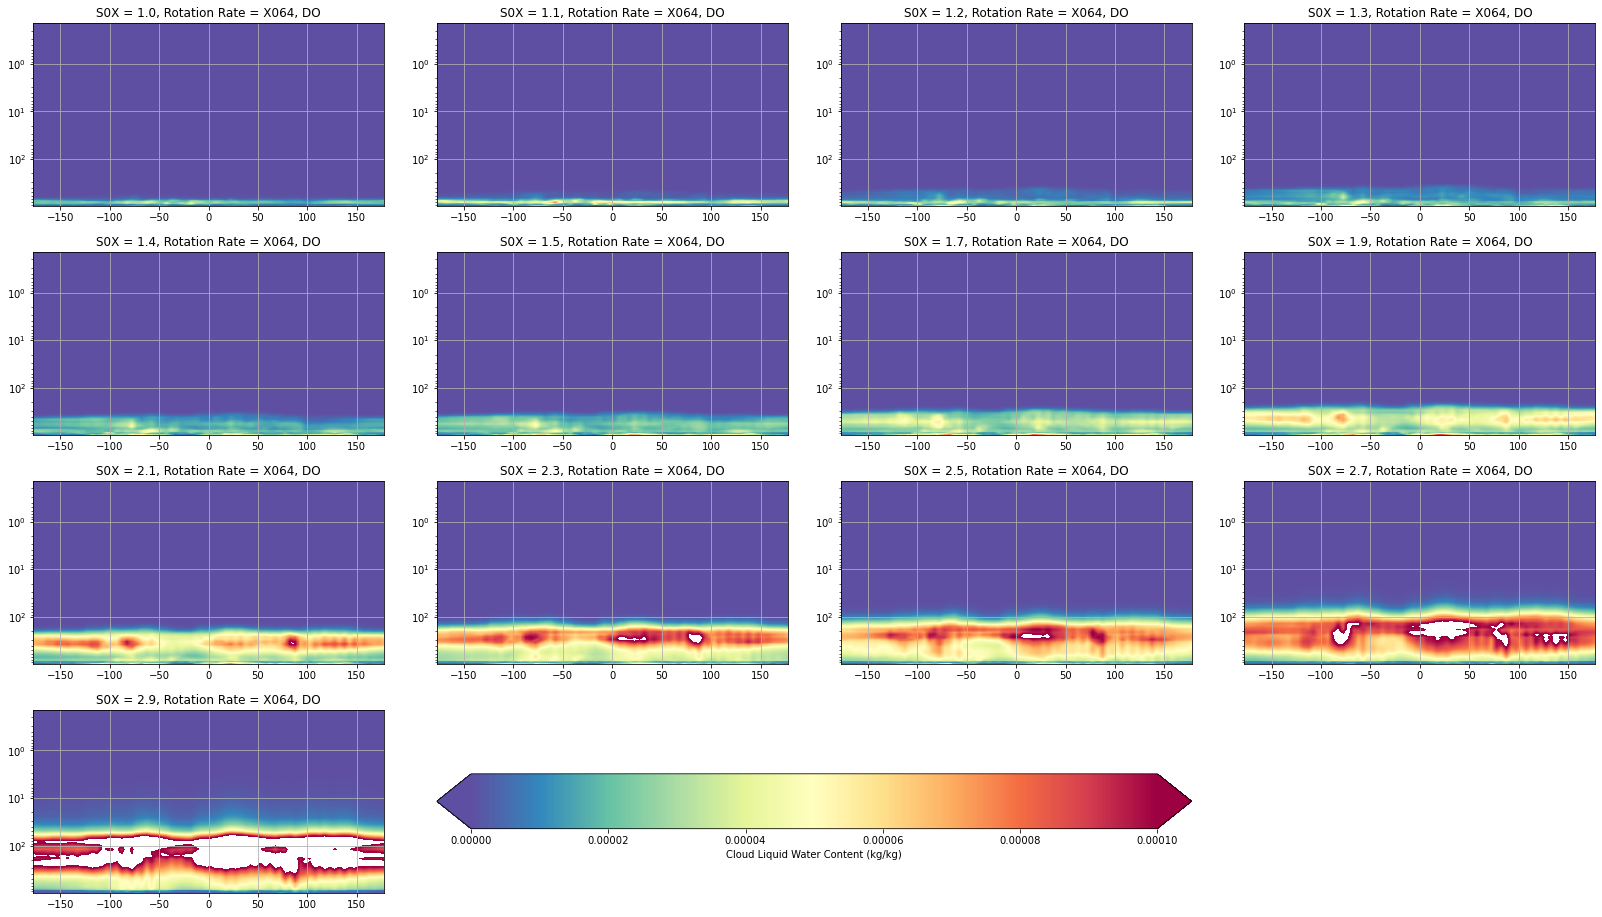

In [5]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'wtrcld'

min_val = 0 # for contour levels and colorbar
max_val = 10*(10**-5)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

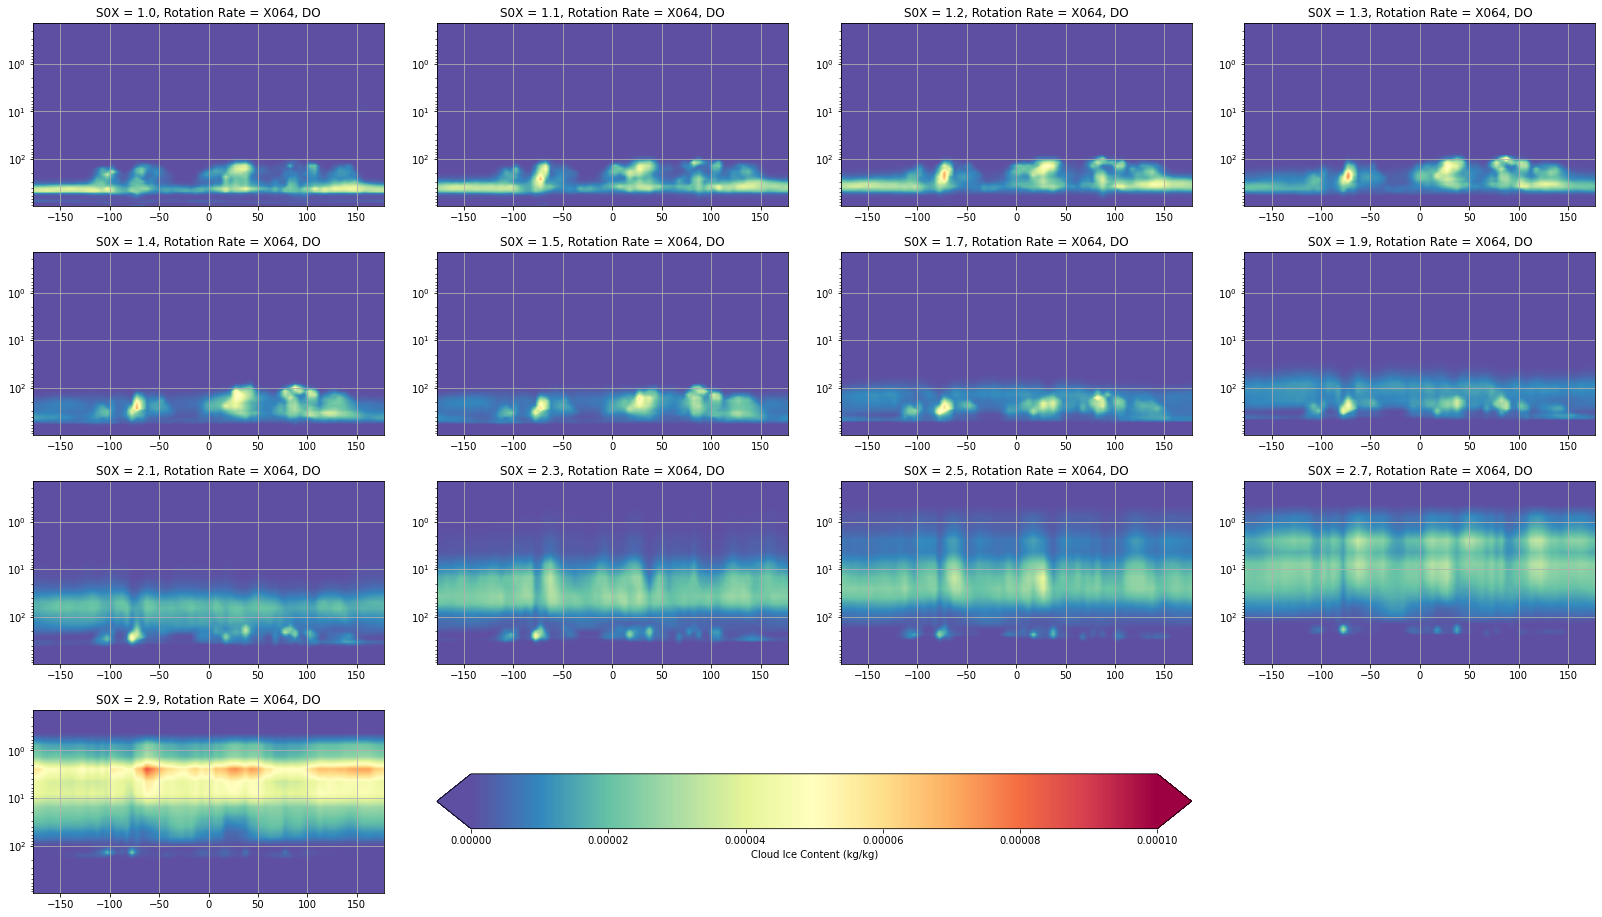

In [6]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'icecld'

min_val = 0 # for contour levels and colorbar
max_val = 10*(10**-5)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

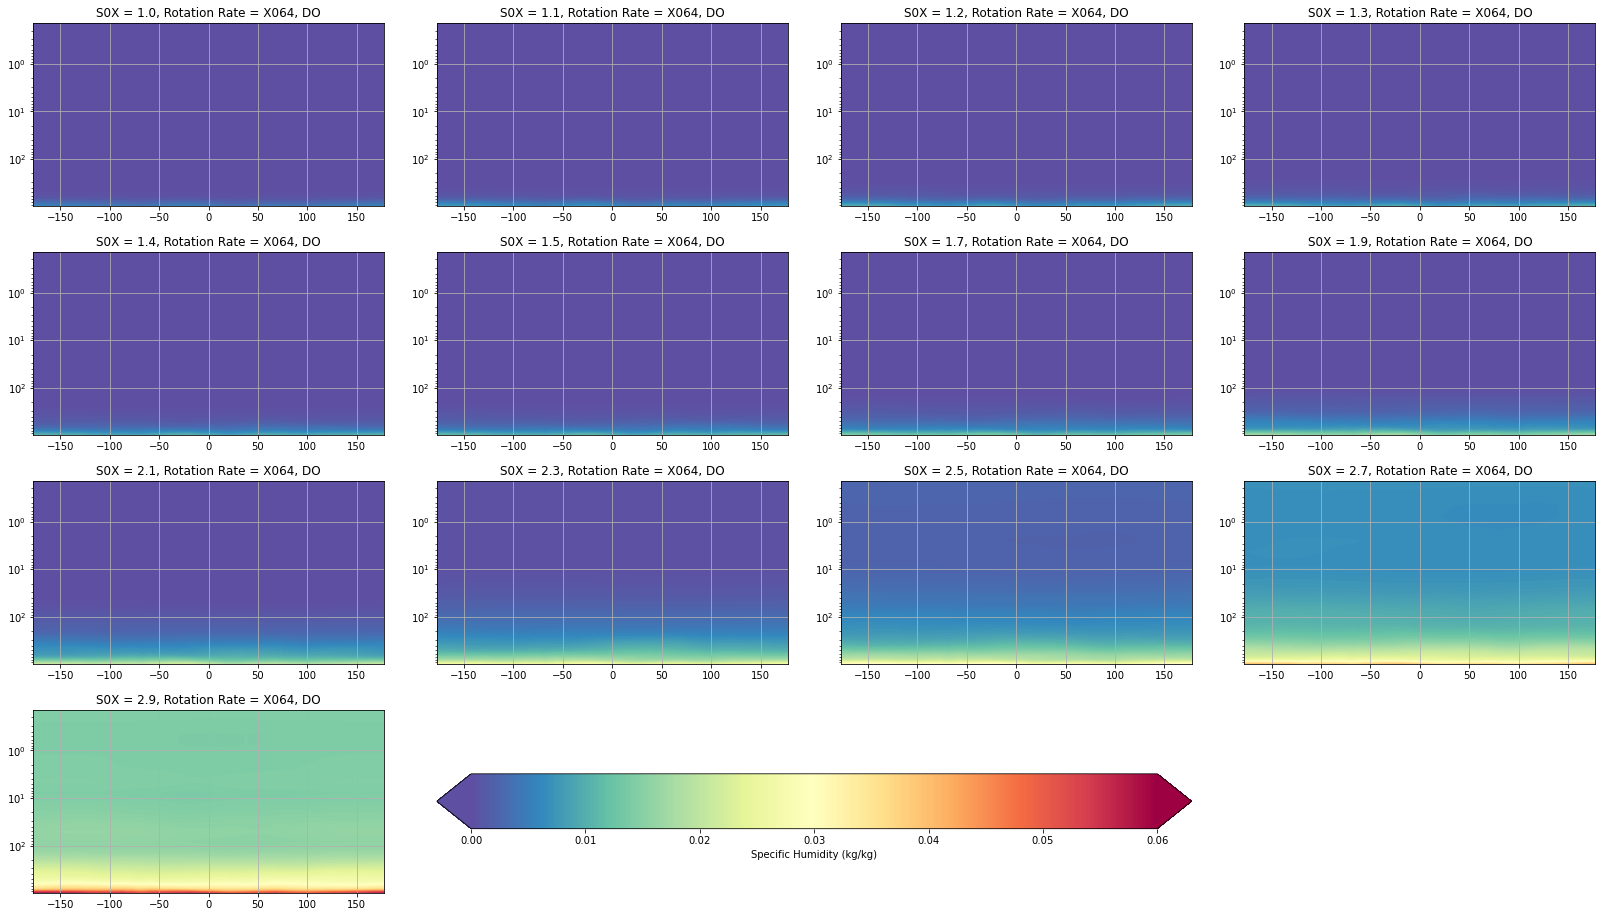

In [15]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'SpHuL'

min_val = 0 # for contour levels and colorbar
max_val = 6*(10**-2)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

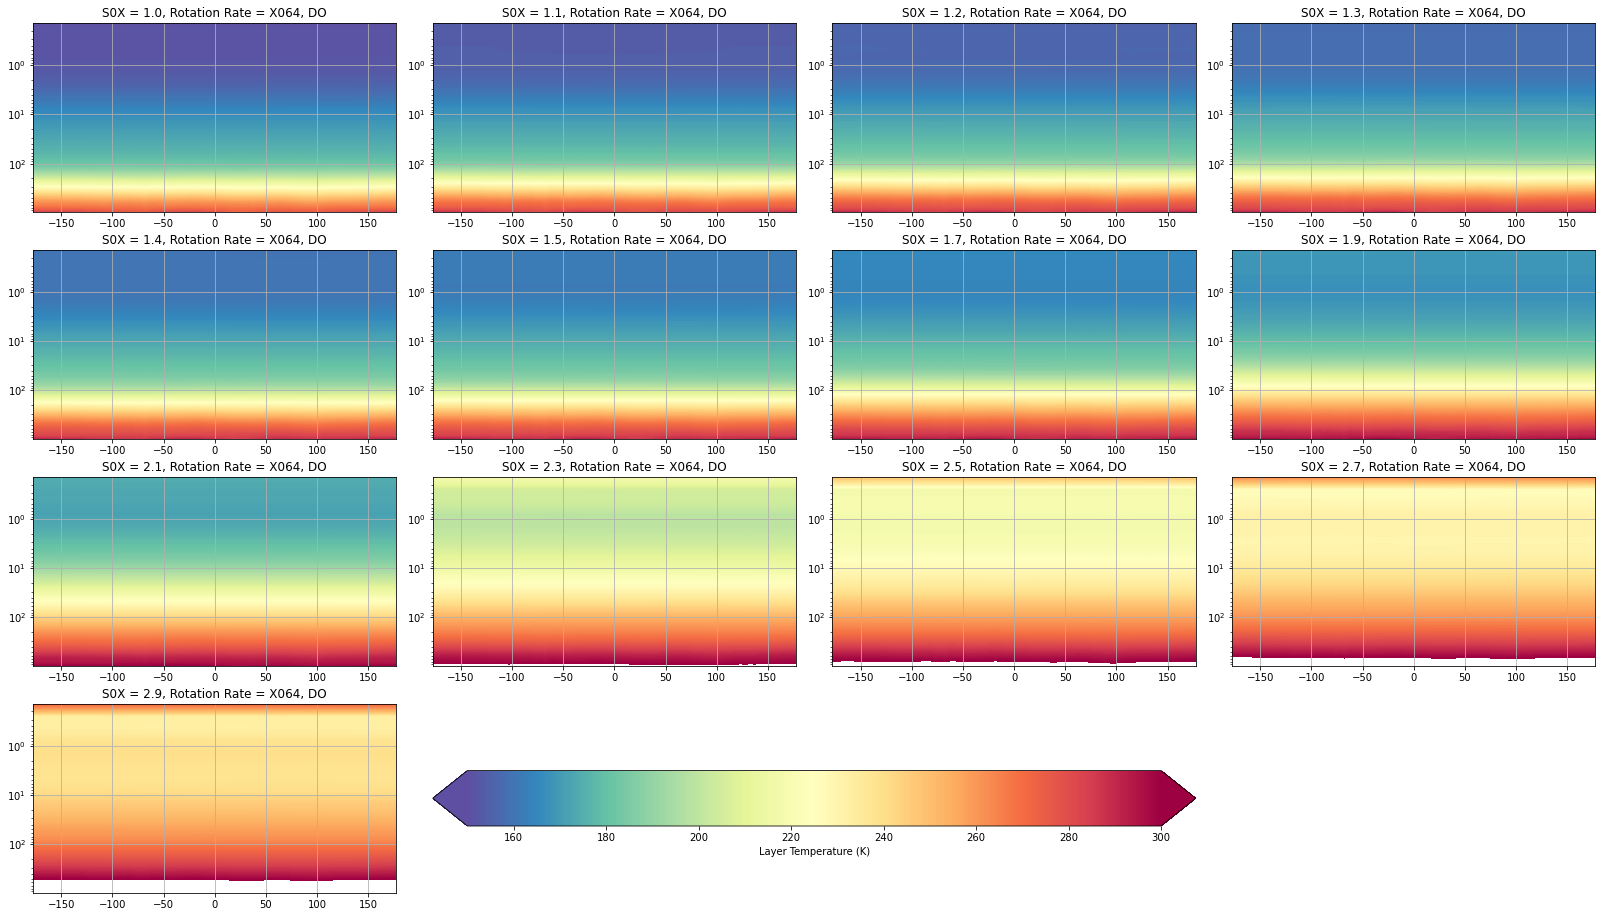

In [17]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.2, wspace=.1)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'TempL'

min_val = 150 # for contour levels and colorbar
max_val = 300

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

# Line plots

In [8]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
filename = 'ANN0990-0999.aijlP212eoDOFP3Od_X064_O30.nc'
var = 'TempL'

data = Dataset(path + filename,'r')
data.variables

# Import lat/lon coordinates and turn them into a meshgrid for plotting
plm = np.array(data['plm'])
lon = np.array(data['lon'])
lonGrid, plmGrid = np.meshgrid(lon, plm)

# Opens variable and converts it to an array
var1 = np.array(data[var])
var1 = np.average(var1,axis=1)
var1 = np.average(var1,axis=0)
np.shape(var1)

(72,)

In [9]:
def open_zonal_line_ROCKE3D(path, filename, var):
    """
    This function opens and plots ROCKE-3D netCDF files
    
    Inputs:
    path - directory where model outputs are kept e.g. 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
    filename - filename is str form, could also be a list of strings
    var - variable name in .nc file. note: this means you have to open the .nc file and figure out the variable name (e.g. 'tsurf')
    Outputs: 
    var1 - variable data in an array
    latGrid - latitude in meshgrid
    longrid - longitudes in meshgrid
    
    """
    
    # Open data
    data = Dataset(path + filename,'r')
    
    # Import lat/lon coordinates and turn them into a meshgrid for plotting
    lon = np.array(data['lon'])
    
    # Opens variable and converts it to an array
    var1 = np.array(data[var])
    var1 = np.mean(var1,axis=1)
    var1 = np.mean(var1,axis=0)
    var_error = np.std(var1)
    
    return var1, lon, var_error

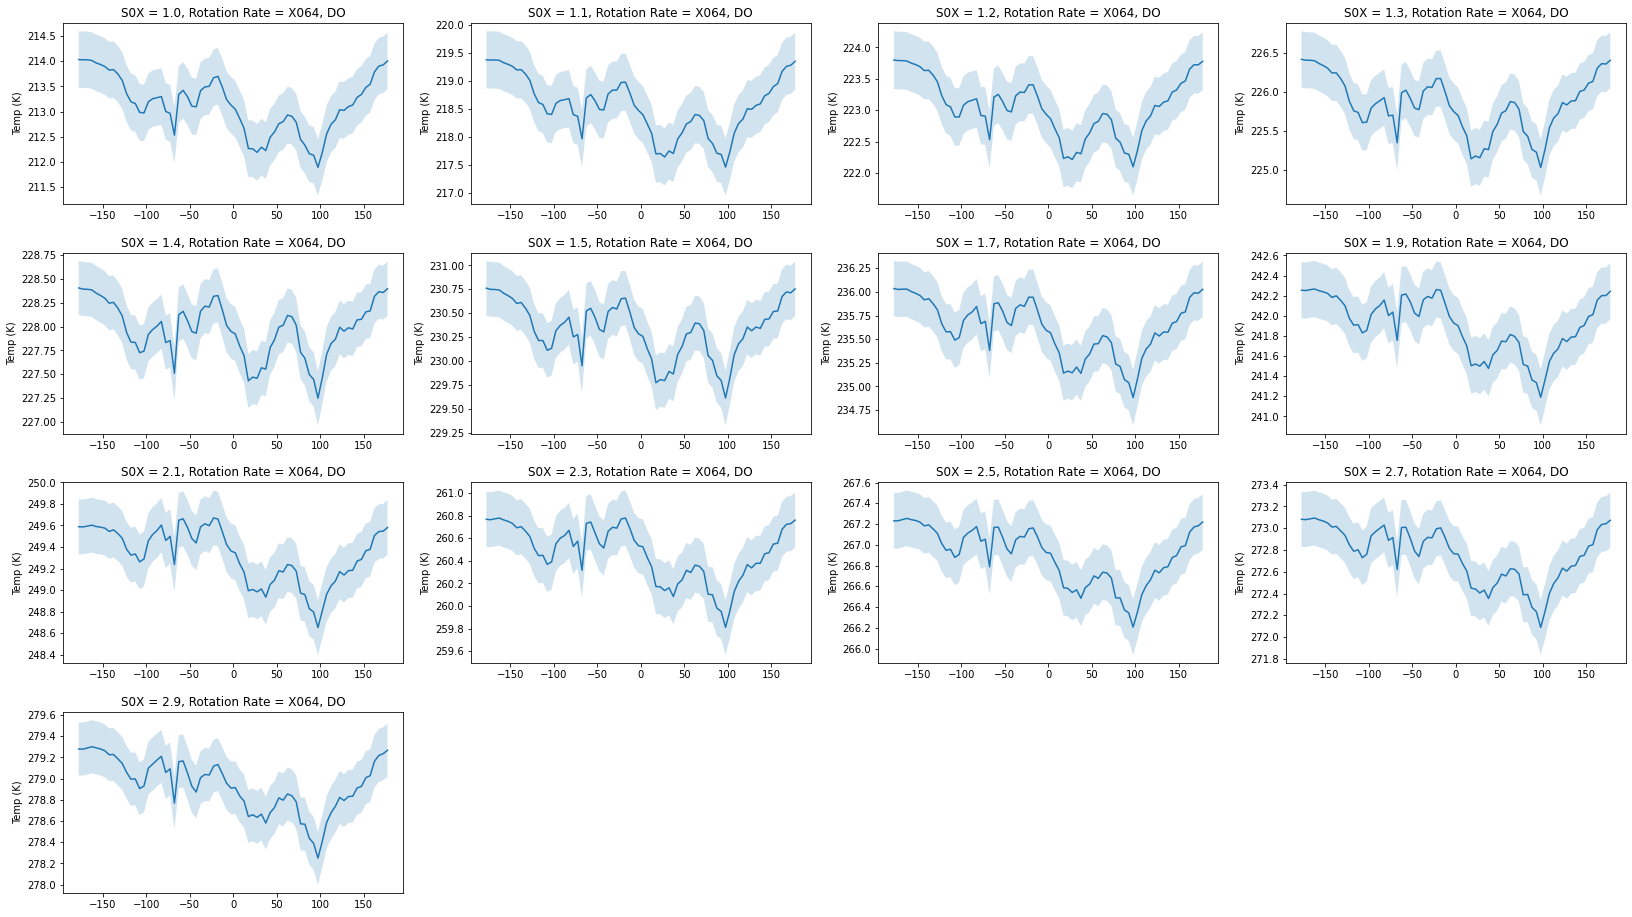

In [14]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.27, wspace=.2)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'TempL'


for i in range(len(files)):
    var1, lon, var_error = open_zonal_line_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].plot(lon, var1)
    ax[i].fill_between(lon, var1+var_error, var1-var_error, alpha=0.2)
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_ylabel('Temp (K)')
#     ax[i].set_ylim(210,280)

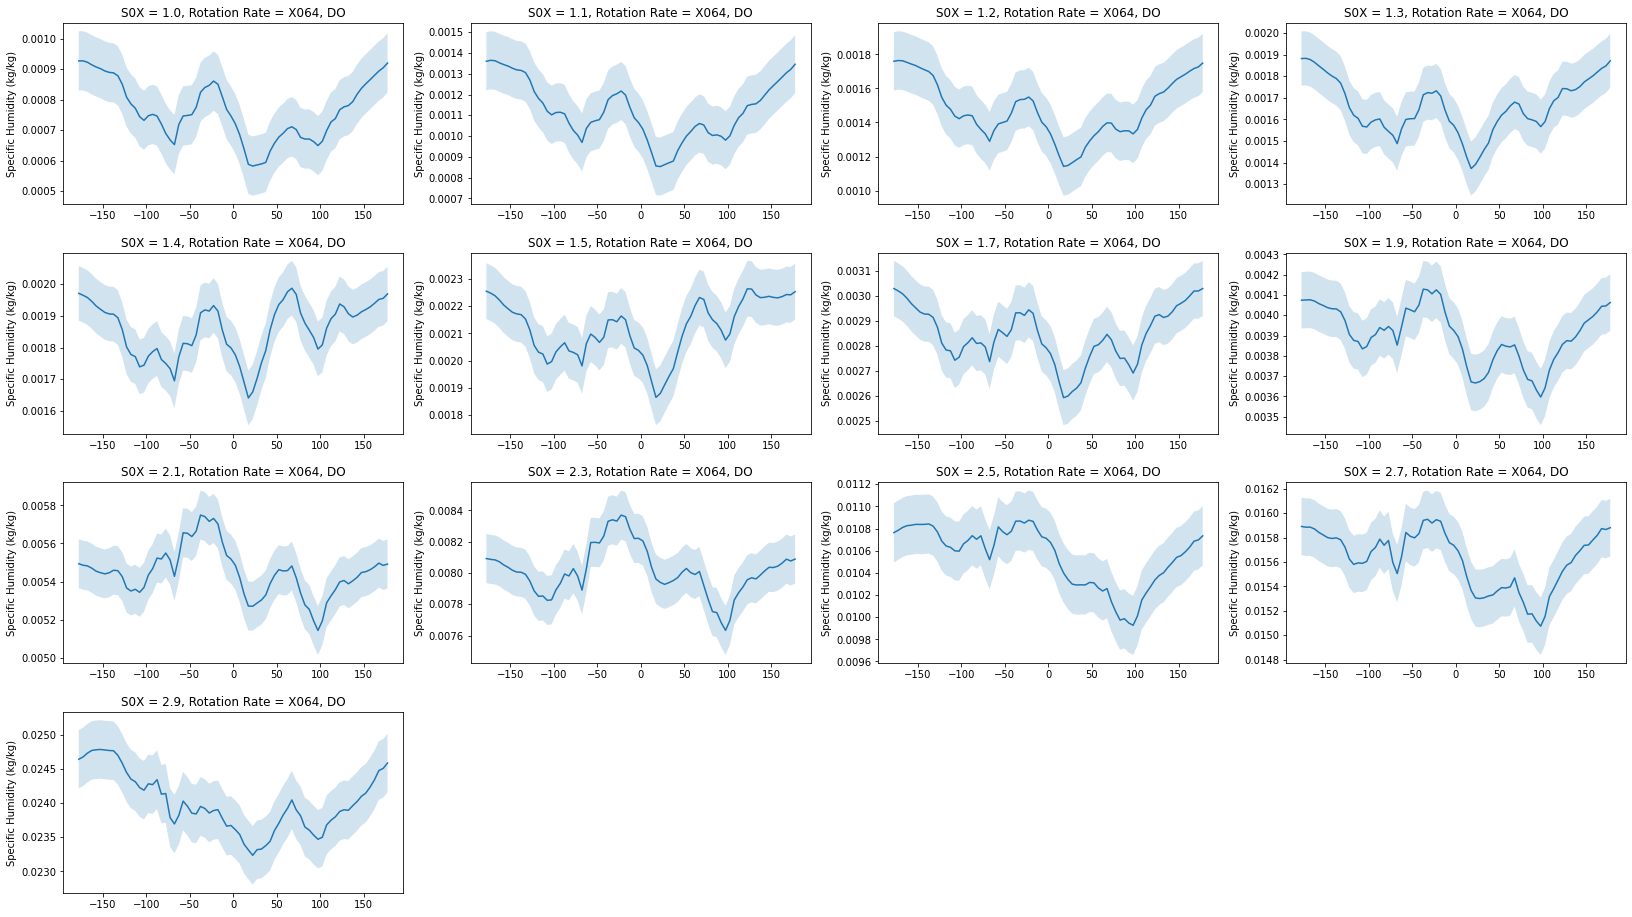

In [11]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.27, wspace=.2)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'SpHuL'

for i in range(len(files)):
    var1, lon, var_error = open_zonal_line_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].plot(lon, var1)
    ax[i].fill_between(lon, var1+var_error, var1-var_error, alpha=0.2)
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_ylabel('Specific Humidity (kg/kg)')
    ax[i].set_ylim(210,280)
    
    # one plot all lines, for all plots

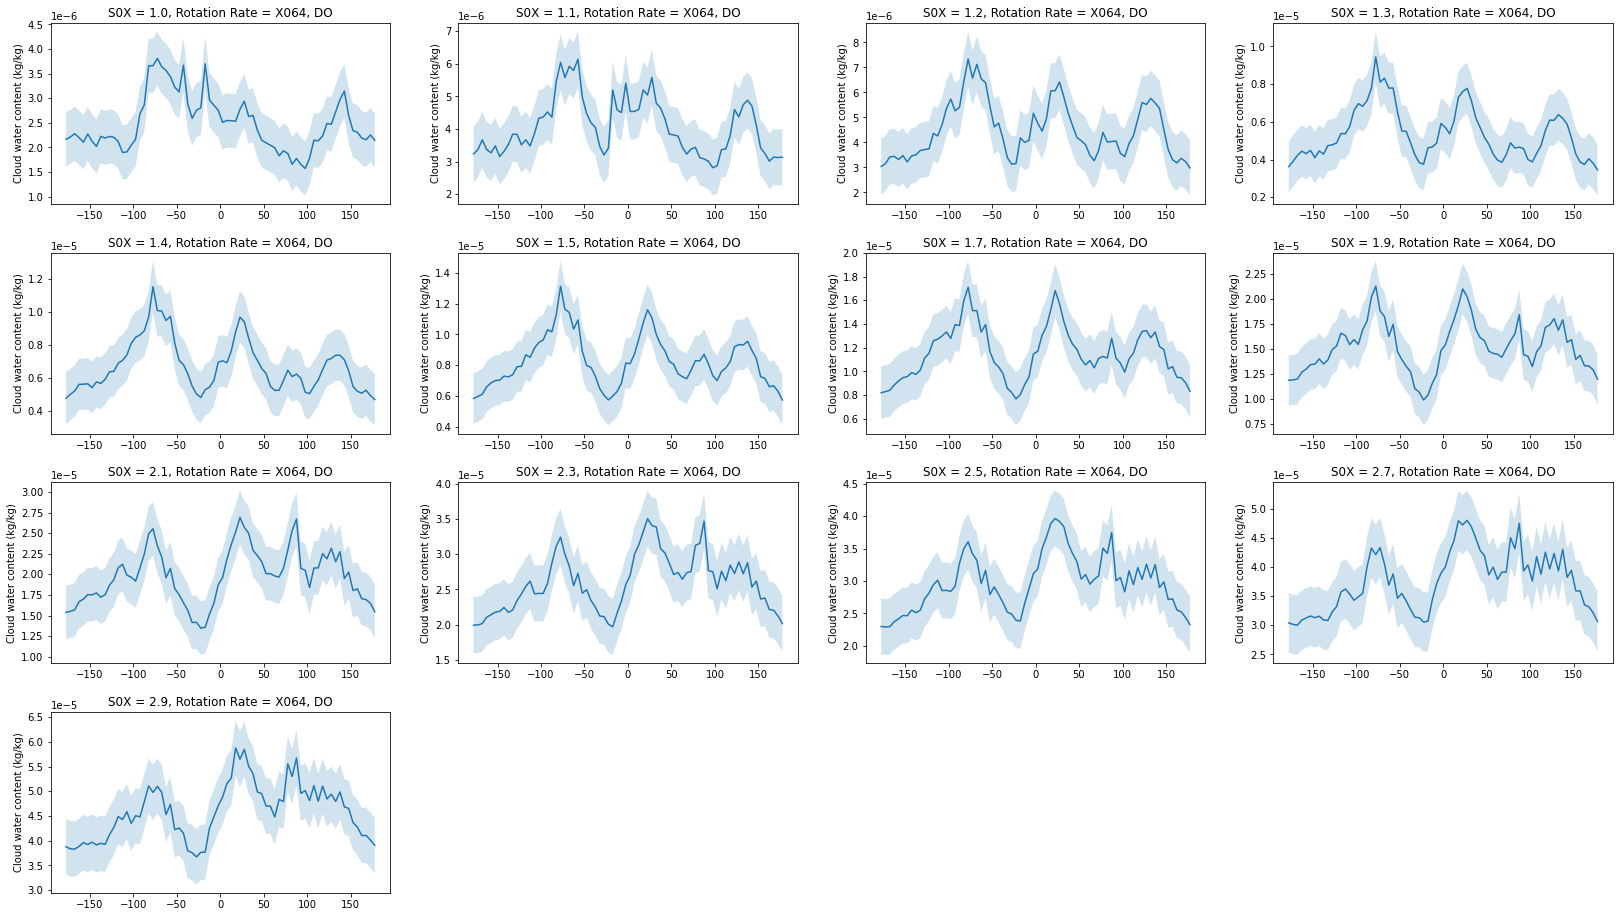

In [12]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.27, wspace=.2)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'wtrcld'

min_val = 150 # for contour levels and colorbar
max_val = 300

for i in range(len(files)):
    var1, lon, var_error = open_zonal_line_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].plot(lon, var1)
    ax[i].fill_between(lon, var1+var_error, var1-var_error, alpha=0.2)
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_ylabel('Cloud water content (kg/kg)')
#     ax[i].set_ylim(210,280)

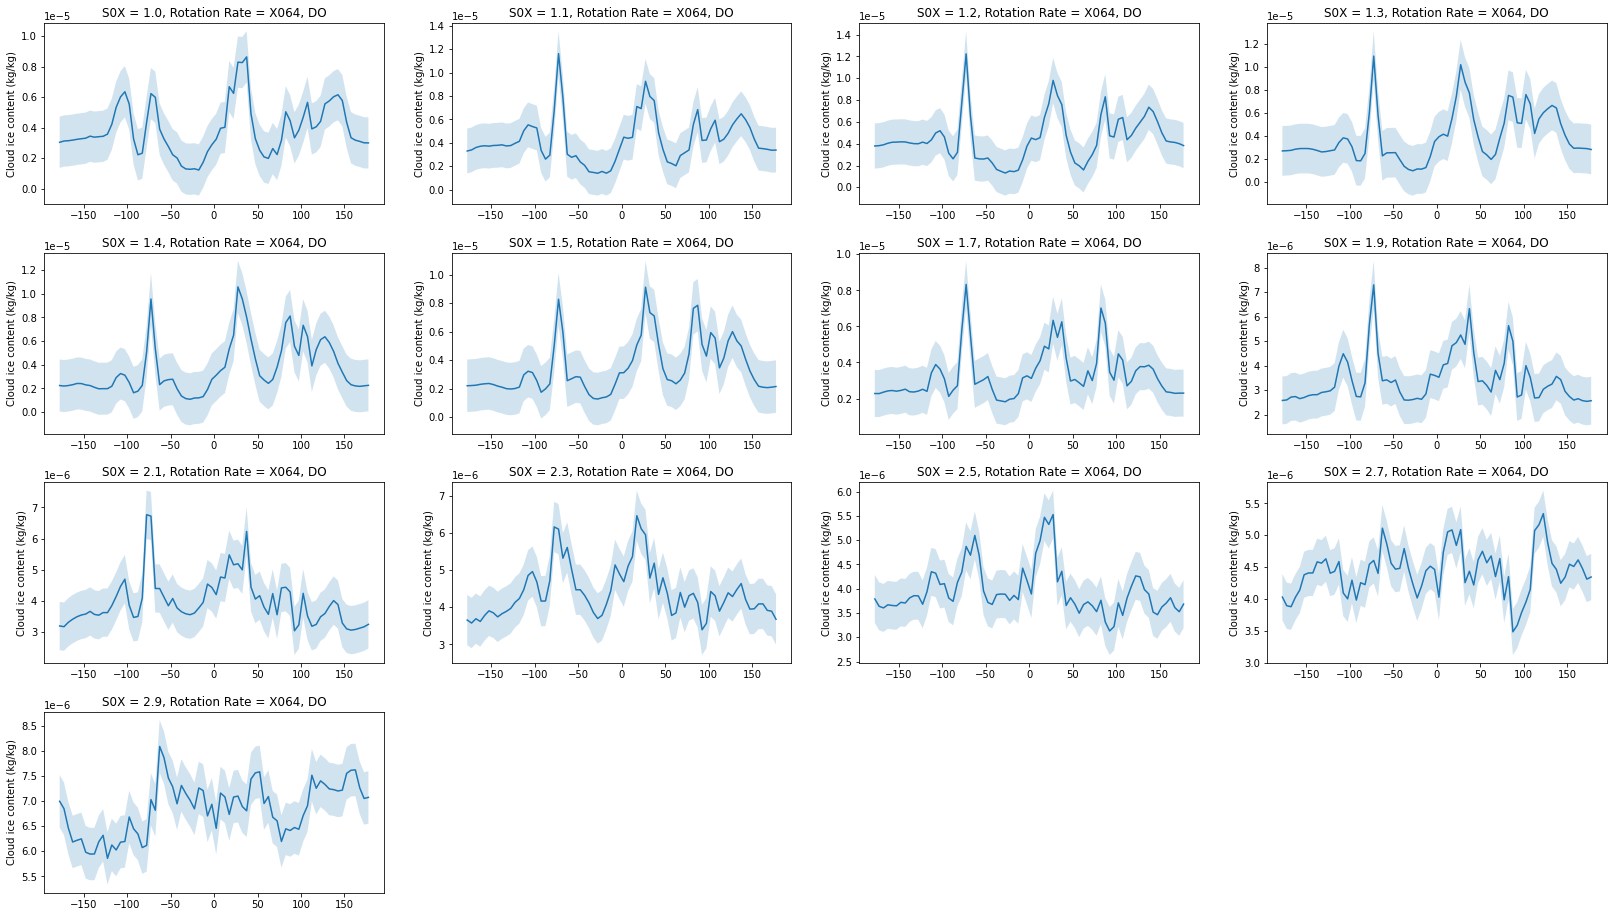

In [13]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.27, wspace=.2)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'icecld'

for i in range(len(files)):
    var1, lon, var_error = open_zonal_line_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].plot(lon, var1)
    ax[i].fill_between(lon, var1+var_error, var1-var_error, alpha=0.2)
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_ylabel('Cloud ice content (kg/kg)')
#     ax[i].set_ylim(210,280)